In [2]:
import pandas as pd
import numpy as np

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = "../../kaggle_data/credit_card_visualization/data/"

Raw_train = pd.read_csv(data_path + "train.csv")
Raw_test = pd.read_csv(data_path + "test.csv")
submission = pd.read_csv(data_path + "submission.csv")

In [5]:
Raw_train.head()

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0


In [6]:
Raw_train.count() # 값의 개수 구하기

store_id        3362796
date            3362796
time            3362796
card_id         3362796
amount          3362796
installments      16860
days_of_week    3362796
holyday         3362796
dtype: int64

In [7]:
num_rows = Raw_train.shape[0] # shpape[0]에 전체 행의 데이터 개수가 저장.
num_missing = num_rows - Raw_train.count()
num_missing

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64

In [8]:
def feature_engineering(df) :
    # Nan
    df = df.fillna(0.0)
    
    # datetime object
    df['datetime'] = df['date'] + ", " + df['time']
    df = df.drop(['date', 'time'], axis = 1)
    df['datetime'] = pd.to_datetime(df['datetime'], format="%Y-%m-%d, %H:%M:%S")
    
    # negative amount
    store_idx = df['store_id'].unique()
    for idx in store_idx :
        split = splitById(idx, df)
        neg_idx = df['amount'] < 0
        
    
    return df

In [39]:
def plot(df) :
    # 기본 4정보
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(2, 2, 1)
    ax2 = fig1.add_subplot(2, 2, 2)
    ax3 = fig1.add_subplot(2, 2, 3)
    ax4 = fig1.add_subplot(2, 2, 4)

    ax1.plot(df['datetime'], df['amount'])
    ax2.plot(df['days_of_week'], df['amount'], 'o')
    ax3.plot(df['holyday'], df['amount'], 'o')
    ax4.plot(df['installments'], df['amount'], 'o')

    ax1.set_title('Amount about Datetime')
    ax1.set_xlabel('Datetime')
    ax1.set_ylabel('Amount')

    ax2.set_title('Amount about Days_of_week')
    ax2.set_xlabel('Days_of_week')
    ax2.set_ylabel('Amount')

    ax3.set_title('Amount about Holyday')
    ax3.set_xlabel('Holyday')
    ax3.set_ylabel('Amount')

    ax4.set_title('Amount about Installments')
    ax4.set_xlabel('Installments')
    ax4.set_ylabel('Amount')

    fig1.tight_layout()
    
    # 요일 histogram
    fig2 = plt.figure()
    ax = fig2.add_subplot(1, 1, 1)

    ax = sns.histplot(df['days_of_week'])
    ax.set_title('Days_of_week Histogram')
    
    # holyday histogram
    fig3 = plt.figure()
    ax = fig3.add_subplot(1, 1, 1)

    ax = sns.histplot(df['holyday'])
    ax.set_title('Holyday Histogram')
    
    # weekdays / weekends
    week_df = pd.DataFrame()
    weekends = (df['days_of_week'] >= 5.0).sum().astype(int)
    weekdays = (df['days_of_week'] < 5.0).sum().astype(int)
    week_df = pd.DataFrame([{'weekends' : weekends, 'weekdays' : weekdays}])
    
    ax = week_df.plot.bar()
    ax.set_title('weekdays / weekends')

In [9]:
def splitById(id, df) :
    idx = df['store_id'] == id
    split = df[idx]
    return split

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0
...,...,...,...,...,...,...,...,...
68768,0,2018-07-31,23:12:44,b07b89c873,74,NaN,1,0
68769,0,2018-07-31,23:16:50,8d4822aa74,97,NaN,1,0
68770,0,2018-07-31,23:40:24,f985e806d7,49,NaN,1,0
68771,0,2018-07-31,23:55:10,2748138407,29,NaN,1,0


In [11]:
train_data = feature_engineering(Raw_train)
train_data

,store_id,card_id,amount,installments,days_of_week,holyday,datetime
0,0,d297bba73f,5,0.0,2,0,2016-12-14 18:05:31
1,0,d297bba73f,-5,0.0,2,0,2016-12-14 18:05:54
2,0,0880849c05,144,0.0,0,0,2016-12-19 12:42:31
3,0,8b4f9e0e95,66,0.0,0,0,2016-12-19 12:48:08
4,0,7ad237eed0,24,0.0,0,0,2016-12-19 13:31:08
...,...,...,...,...,...,...,...
3362791,1799,e254bf70d9,600,0.0,3,0,2018-07-19 17:58:31
3362792,1799,8f41c89891,275,0.0,3,0,2018-07-19 18:54:34
3362793,1799,aeb64fe1fb,350,0.0,6,0,2018-07-22 14:46:57
3362794,1799,57932602d6,300,0.0,2,0,2018-07-25 18:09:13


In [13]:
store_0 = splitById(0, train_data)
store_0

,store_id,card_id,amount,installments,days_of_week,holyday,datetime
0,0,d297bba73f,5,0.0,2,0,2016-12-14 18:05:31
1,0,d297bba73f,-5,0.0,2,0,2016-12-14 18:05:54
2,0,0880849c05,144,0.0,0,0,2016-12-19 12:42:31
3,0,8b4f9e0e95,66,0.0,0,0,2016-12-19 12:48:08
4,0,7ad237eed0,24,0.0,0,0,2016-12-19 13:31:08
...,...,...,...,...,...,...,...
68768,0,b07b89c873,74,0.0,1,0,2018-07-31 23:12:44
68769,0,8d4822aa74,97,0.0,1,0,2018-07-31 23:16:50
68770,0,f985e806d7,49,0.0,1,0,2018-07-31 23:40:24
68771,0,2748138407,29,0.0,1,0,2018-07-31 23:55:10


<IPython.core.display.Javascript object>


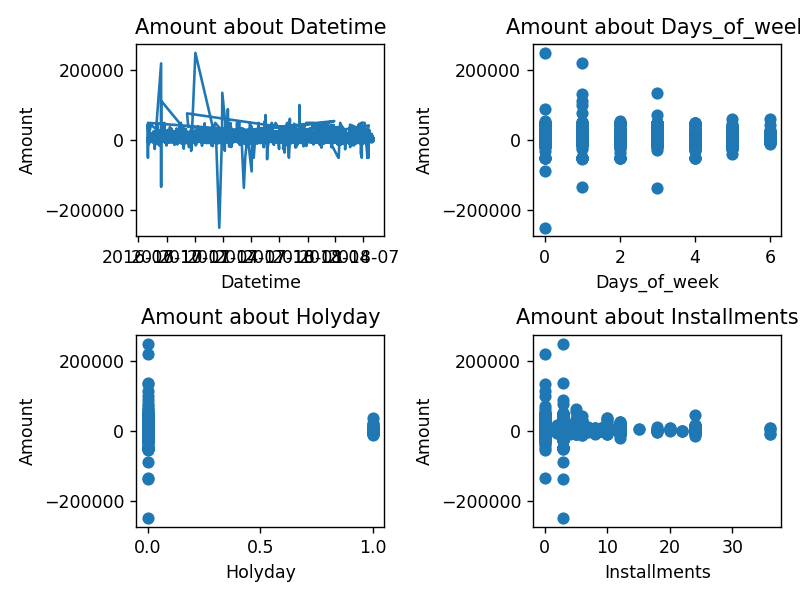

<IPython.core.display.Javascript object>


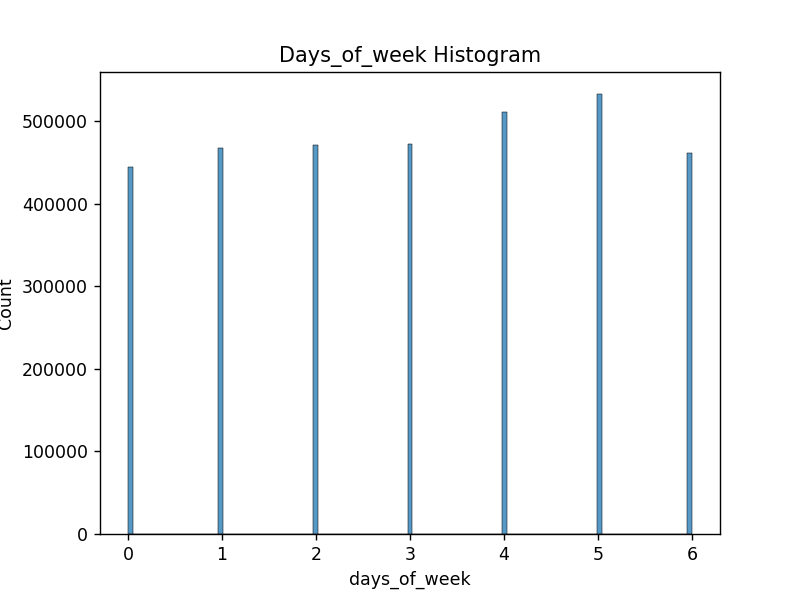

<IPython.core.display.Javascript object>


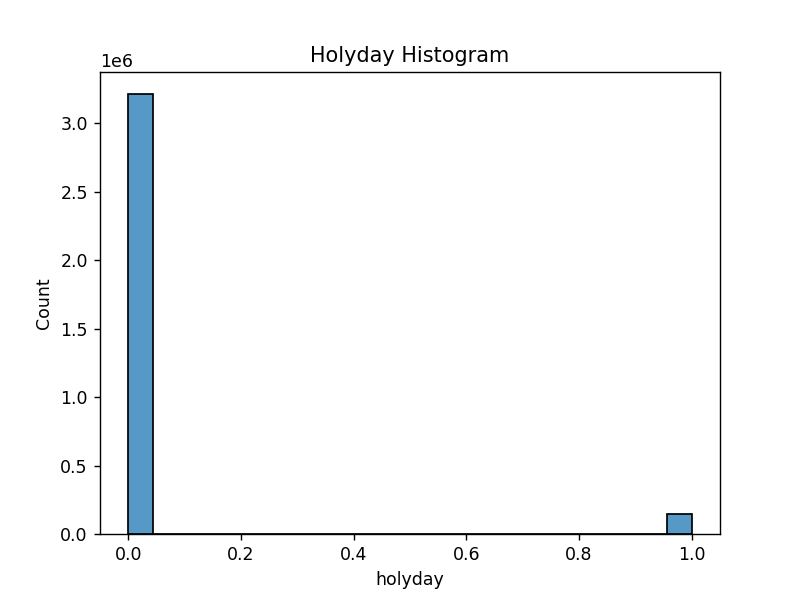

<IPython.core.display.Javascript object>


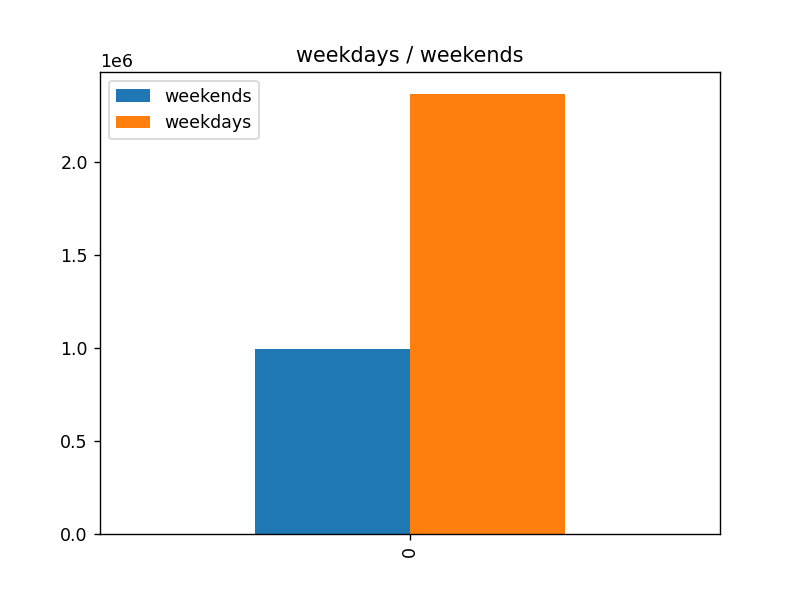

In [41]:
plot(train_data)